<a href="https://colab.research.google.com/github/ahmedtarek-/Deep-Q-Learning/blob/main/deep_q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
  <img style="float: left;"  width="140" src=" 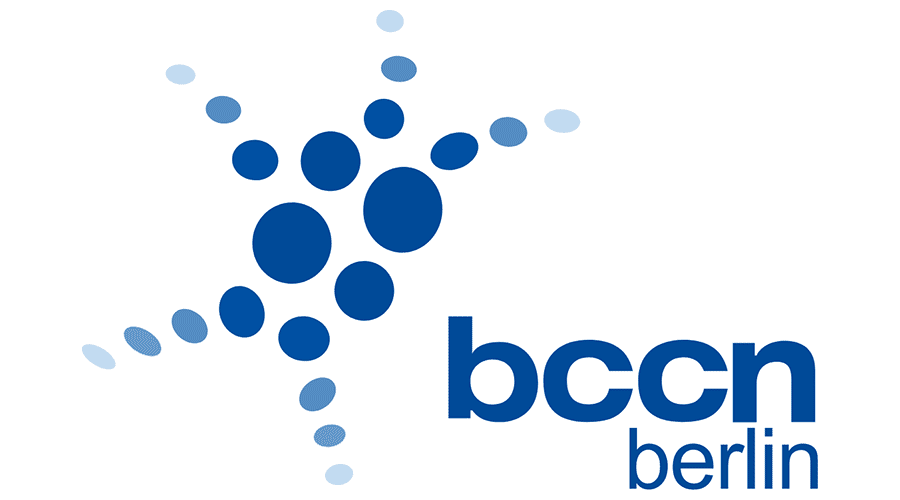">
</div>

<h1 id="course-title-heading">
    <div style="text-align: right">
        Models of Higher Brain Functions
        <br>Computer Course
        <br>
    </div>
</h1>
    
---
<div style="text-align: left; float: left">
    Lecturer: Prof. Dr. Henning Sprekeler
</div>

<div style="text-align: right">
    Assistant: Jarek Liesen
    <br>(jarek@bccn-berlin.de)
</div>



# Deep Q-Learning Project (MHBF)

Names: Ahmed Abdalfatah - Arina Belova
Group: "O"

In [1]:
# Cloning the required files from git directly to avoid pain
!git clone https://github.com/ahmedtarek-/Deep-Q-Learning.git
!cp -r /content/Deep-Q-Learning/gym-grid/gym_grid gym_grid

Cloning into 'Deep-Q-Learning'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 27 (delta 7), reused 19 (delta 5), pack-reused 0
Unpacking objects: 100% (27/27), 23.22 KiB | 2.32 MiB/s, done.


In [2]:
# Install required packages
!pip install -q gym==0.15.4
!pip install -q pycolab==1.2
!pip install -q torch==1.2.0
#!pip install -q matplotlib==3.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.12.1 requires cloudpickle>=1.5.0, but you have cloudpickle 1.2.2 which is incompatible.
tensorflow-probability 0.20.1 requires cloudpickle>=1.3, but you have cloudpickle 1.2.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 6.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement torch==1.2.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.2.0


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import required packages
import gym
import gym_grid

import numpy as np
import matplotlib.pyplot as plt

# Part 1 - Environment Implementation

/usr/local/lib/python3.10/dist-packages/pycolab/ascii_art.py:318: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  art = np.vstack(np.fromstring(line, dtype=np.uint8) for line in art)


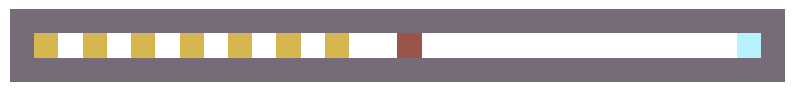

In [10]:
# Visualize the environment
plt.figure(figsize=(10, 10))

# T-Maze Environment
env = gym.make("LinearTrack-v0")
_, obs_to_render = env.reset_with_render()
env.render(obs_to_render)

# TODO: Deadly Gridworld
# env = gym.make("DeadlyGrid-v0")
# _, obs_to_render = env.reset_with_render()
# env.render(obs_to_render)

100
2


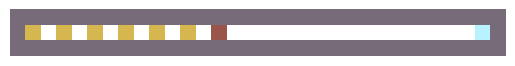

In [75]:
# Run random steps & Visualize the episode
from IPython import display

_, obs_to_render = env.reset_with_render()
env.render(obs_to_render)
rew_total = 0
for i in range(50):
    action = env.action_space.sample()
    _, rew , done, _, obs_to_render = env.step_with_render(action)
    env.render(obs_to_render)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    rew_total += rew
    if done:
        break
print(rew_total)
print(action)

# Part 2 - Deep Q-Learning Agents

In [12]:
# PLAYGROUND CELL
states = env.observation_space.shape
actions = env.action_space.n

env.observation_space.shape

(3, 32, 4)

### 1) Defining Network

In [88]:
import torch
import torch.nn as nn


def gimme_a_network(input_size, output_size, lr):
  # Defining the model
  model = nn.Sequential(
      nn.Linear(input_size, 128),
      nn.ReLU(),
      nn.Linear(128, output_size),
      nn.ReLU()
  )

  # Defining the loss function
  loss_func = nn.MSELoss()

  # Defining optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  return model, loss_func, optimizer



states = np.prod(env.observation_space.shape)
actions = env.action_space.n

model, loss_func, optimizer = gimme_a_network(states, actions, 0.001)
env.action_space.sample()

2

### 2) Defining policy

In [94]:
def eps_greedy(q, e=0.2):
  rand = np.random.uniform(0, 1)
  if rand <= (1 - e):
    chosen_action = torch.argmax(q_t).item()
  else:
    chosen_action = np.random.choice(range(len(q)))

  q_value = q[chosen_action]
  return chosen_action, q_value

### 3) Defining Y_hat

In [95]:
def calculate_y_hat(reward, max_next_q, eta=0.1):
  return torch.Tensor([reward + eta * max_next_q])

In [99]:
# #### PLAYGROUND

# current_state = env.reset()
# current_obs_tensor = torch.Tensor(current_state.flatten())


# # 1. Forward pass on NN to get the Q(t)
# q_t = model(current_obs_tensor)

# # 2. Decide which action to choose based on policy
# chosen_action, current_q_value = eps_greedy(q_t, e=0.3)

# # 3. Take action/step and get reward and next state
# next_state, reward , done, _ = env.step(chosen_action)

# # 4. Run another forward pass to get all q_values for next_state
# next_obs_tensor = torch.Tensor(next_state.flatten())
# q_next_t = model(next_obs_tensor)

# # 5. Get maximum q_value
# _, next_max_q_value = eps_greedy(q_next_t, e=0)
# next_max_q_value, q_next_t

# # 6. Calculate Y_hat
# y_hat = calculate_y_hat(reward, next_max_q_value)

# # 7. Loss function
# loss = loss_func(q_t, y_hat)

# # 8. Backpropagate to learn
# optimizer.zero_grad()
# loss.backward()
# optimizer.step()

### 2) Defining main loop

In [ ]:

def the_loop(model, env, num_episodes=50, policy=eps_greedy):
  current_state = env.reset()

  for i in range(num_episodes):
    # 1. Forward pass on NN to get the Q(t)
    current_obs_tensor = torch.Tensor(current_state.flatten())
    q_t = model(current_obs_tensor)

    # 2. Decide which action to choose based on policy
    chosen_action, current_q_value = eps_greedy(q_t, e=0.3)

    # 3. Take action/step and get reward and next state
    next_state, reward , done, _ = env.step(chosen_action)

    # 4. Run another forward pass to get all q_values for next_state
    next_obs_tensor = torch.Tensor(next_state.flatten())
    q_next_t = model(next_obs_tensor)

    # 5. Get maximum q_value
    _, next_max_q_value = eps_greedy(q_next_t, e=0)
    next_max_q_value, q_next_t

    # 6. Calculate Y_hat
    y_hat = calculate_y_hat(reward, next_max_q_value)

    # 7. Loss function
    loss = loss_func(q_t, y_hat)

    # 8. Backpropagate to learn
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # YAAAY repeat now






# for n in range(num_epochs):
#     y_pred = model(X)
#     loss = loss_fn(y_pred, y)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()